<a href="https://colab.research.google.com/github/Ishannilawar/Capstone/blob/master/Transfer%20Learning%20Inception%20V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [13]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

ERROR:tensorflow:An interactive session is already active. This can cause out-of-memory errors or some other unexpected errors (due to the unpredictable timing of garbage collection) in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s). Please use `tf.Session()` if you intend to productionize.


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [15]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/Othercomputers/My Laptop/Capstone/Pharmaceutical and Biomedical Waste (PBW)/Train Images'
valid_path = '/content/drive/Othercomputers/My Laptop/Capstone/Pharmaceutical and Biomedical Waste (PBW)/Test Images'


In [16]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [29]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [36]:
  # useful for getting number of output classes
folders = glob('/content/drive/Othercomputers/My Laptop/Capstone/Pharmaceutical and Biomedical Waste (PBW)/Train Images/*')

In [37]:
folders

['/content/drive/Othercomputers/My Laptop/Capstone/Pharmaceutical and Biomedical Waste (PBW)/Train Images/(GE) Glass equipment-packaging 551',
 '/content/drive/Othercomputers/My Laptop/Capstone/Pharmaceutical and Biomedical Waste (PBW)/Train Images/(ME) Metal equipment -packaging',
 '/content/drive/Othercomputers/My Laptop/Capstone/Pharmaceutical and Biomedical Waste (PBW)/Train Images/(OW) Organic wastes',
 '/content/drive/Othercomputers/My Laptop/Capstone/Pharmaceutical and Biomedical Waste (PBW)/Train Images/(PE) Plastic equipment-packaging',
 '/content/drive/Othercomputers/My Laptop/Capstone/Pharmaceutical and Biomedical Waste (PBW)/Train Images/(PP) Paper equipment-packaging',
 '/content/drive/Othercomputers/My Laptop/Capstone/Pharmaceutical and Biomedical Waste (PBW)/Train Images/(SN) Syringe needles',
 '/content/drive/Othercomputers/My Laptop/Capstone/Pharmaceutical and Biomedical Waste (PBW)/Train Images/Gauze',
 '/content/drive/Othercomputers/My Laptop/Capstone/Pharmaceutical 

In [38]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [39]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [40]:

# view the structure of the model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 22,417,196 (85.51 MB)

 Trainable params: 614,412 (2.34 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [41]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [42]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [46]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/Othercomputers/My Laptop/Capstone/Pharmaceutical and Biomedical Waste (PBW)/Train Images',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5259 images belonging to 12 classes.


In [47]:
test_set = test_datagen.flow_from_directory('/content/drive/Othercomputers/My Laptop/Capstone/Pharmaceutical and Biomedical Waste (PBW)/Test Images',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1327 images belonging to 12 classes.


In [51]:
# Fit the model using the `fit` method
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 2234s 13s/step - accuracy: 0.7295 - loss: 4.2523 - val_accuracy: 0.9118 - val_loss: 0.9230
Epoch 2/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 110s 668ms/step - accuracy: 0.9622 - loss: 0.2985 - val_accuracy: 0.9442 - val_loss: 0.4324
Epoch 3/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 145s 686ms/step - accuracy: 0.9756 - loss: 0.2343 - val_accuracy: 0.9714 - val_loss: 0.2845
Epoch 4/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 111s 670ms/step - accuracy: 0.9756 - loss: 0.2582 - val_accuracy: 0.9699 - val_loss: 0.2870
Epoch 5/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 144s 681ms/step - accuracy: 0.9799 - loss: 0.2353 - val_accuracy: 0.9774 - val_loss: 0.2623
Epoch 6/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 120s 724ms/step - accuracy: 0.9879 - loss: 0.1698 - val_accuracy: 0.9864 - val_loss: 0.1621
Epoch 7/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 132s 663ms/step - accuracy: 0.9784 - loss: 0.2828 - val_accuracy: 0.9849 - val_loss: 0.1704
Epoch 8/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 142s 662ms/step - accuracy: 0.9816 - 

In [52]:
import matplotlib.pyplot as plt

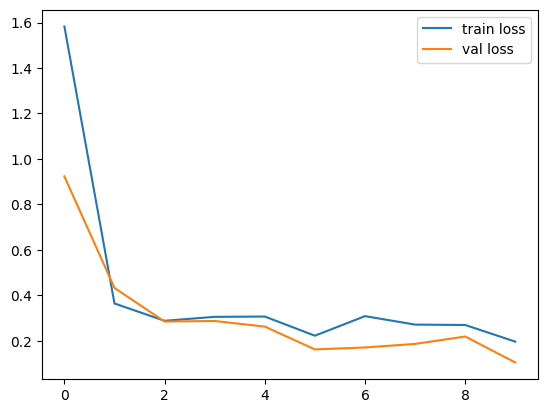

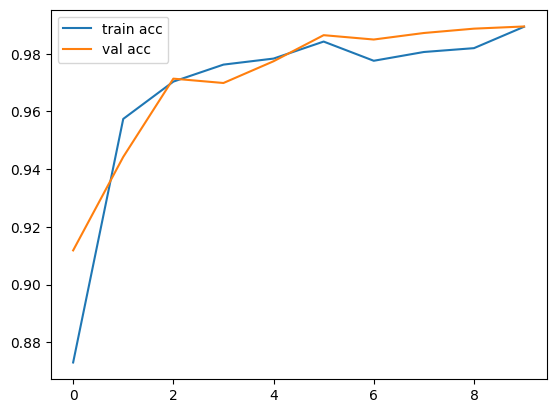

<Figure size 640x480 with 0 Axes>

In [54]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [57]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [58]:

y_pred = model.predict(test_set)


42/42 ━━━━━━━━━━━━━━━━━━━━ 23s 400ms/step


In [60]:
y_pred

array([[2.8025969e-45, 0.0000000e+00, 2.7605580e-43, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 3.0297715e-13, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [61]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [62]:
y_pred

array([ 8,  6, 11, ...,  2,  9, 10])

In [63]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [66]:
model=load_model('model_inception.h5')

In [71]:
img=image.load_img('/content/drive/Othercomputers/My Laptop/Capstone/Pharmaceutical and Biomedical Waste (PBW)/test img.jpeg',target_size=(224,224))



In [72]:
x=image.img_to_array(img)
x

array([[[243., 246., 251.],
        [243., 246., 251.],
        [243., 246., 251.],
        ...,
        [243., 246., 251.],
        [243., 246., 251.],
        [243., 246., 251.]],

       [[243., 246., 251.],
        [243., 246., 251.],
        [243., 246., 251.],
        ...,
        [243., 246., 251.],
        [243., 246., 251.],
        [243., 246., 251.]],

       [[243., 246., 251.],
        [243., 246., 251.],
        [243., 246., 251.],
        ...,
        [243., 246., 251.],
        [243., 246., 251.],
        [243., 246., 251.]],

       ...,

       [[245., 246., 251.],
        [245., 246., 251.],
        [245., 246., 251.],
        ...,
        [243., 246., 251.],
        [243., 246., 251.],
        [243., 246., 251.]],

       [[245., 246., 251.],
        [245., 246., 251.],
        [245., 246., 251.],
        ...,
        [243., 246., 251.],
        [243., 246., 251.],
        [243., 246., 251.]],

       [[245., 246., 251.],
        [245., 246., 251.],
        [245., 2

In [73]:
x.shape

(224, 224, 3)

In [74]:
x=x/255

In [75]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [76]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


array([[3.9716509e-01, 1.9570699e-11, 5.4724753e-10, 6.0228288e-01,
        6.2334171e-14, 1.0526511e-06, 2.5886166e-04, 4.0435563e-10,
        2.8698731e-04, 6.6258201e-12, 1.4159971e-08, 5.1249085e-06]],
      dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

array([ True])

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.2.0'